In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import astropy.units as u

In [11]:
#Pl_mass = mstar*mass ratio
pl_mass = 0.460091*0.000151
print(pl_mass)

6.947374100000001e-05


In [80]:
planet_name = 'GJ 436 b'
r_e = 6.378e+8    # Earth radius (cm)
m_s = 2e+33      # Earth mass (g)

# Exoplanet radius and mass and their uncertainties
Radius = 3.8271295290132676 * r_e
Radius_unc = 0.07674026192447983 * r_e
Mass = pl_mass * m_s
Mass_unc = 0 * m_s

# Density function
def density(mass, radius):    
    return 3 * mass / (4 * np.pi * radius**3)

# Uncertainty function
def uncertainty(density, radius, mass, r_unc, m_unc):
    volume = 4/3 * np.pi * radius**3
    v_err = 4 * np.pi * r_unc
    v_err = v_err.value
    v_err = v_err * volume.unit
    return density * np.sqrt((v_err/volume)**2 + (m_unc/mass)**2)

# Calculate density and uncertainty
Density = density(Mass, Radius)
Uncertainty = uncertainty(Density, Radius, Mass, Radius_unc, Mass_unc)

Density

AttributeError: 'float' object has no attribute 'value'

In [81]:
GJ_mass = 24.61686822145652 * u.Mearth
GJ_mass = GJ_mass.to(u.g)
GJ_mass_err = 1.9673737436366752 * u.Mearth
GJ_mass_err = GJ_mass_err.to(u.g)
GJ_radius = 3.8271295290132676 * u.Rearth
GJ_radius = GJ_radius.to(u.cm)
GJ_radius_err = 0.07674026192447983 * u.Rearth
GJ_radius_err = GJ_radius_err.to(u.cm)

GJ_density = density(GJ_mass, GJ_radius)
GJ_density_err = uncertainty(GJ_density, GJ_radius, GJ_mass, GJ_radius_err, GJ_mass_err)

print(GJ_density)
print(GJ_density_err)

2.413141243024535 g / cm3
0.19285762423163097 g / cm3


In [89]:
NEA_data = pd.read_csv('../Project_1/data/PS_2023.01.18_12.09.56.csv', header=100)
print(NEA_data.columns)

# Get planets with similar mass and radius to GJ 436 b
NEA_data = NEA_data[(NEA_data['pl_rade'] > 2.0) & (NEA_data['pl_rade'] < 5.8) & (NEA_data['pl_bmasse'] > 14) & (NEA_data['pl_bmasse'] < 34)]
# Add density column
radius_list = NEA_data['pl_rade'].tolist()*u.Rearth
mass_list = NEA_data['pl_bmasse'].tolist()*u.Mearth
NEA_data['pl_dens'] = density(mass_list.to(u.g), radius_list.to(u.cm))
print(NEA_data['pl_dens'])

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/tt/4h6jq1d11tn5bc8lmvpp5t8r0000gn/T/ipykernel_932/484900074.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


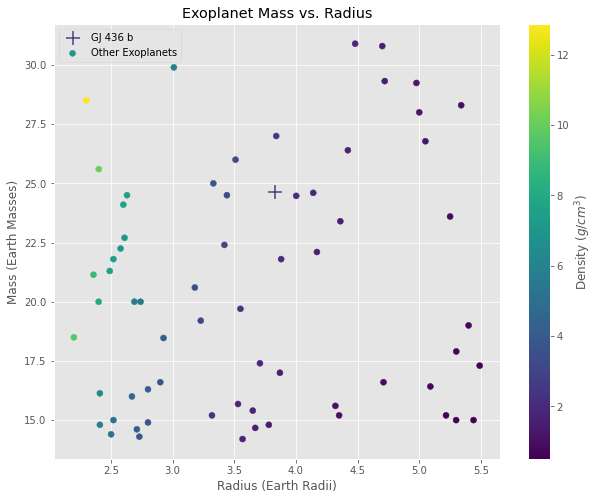

In [91]:
plt.figure(figsize=(10,8))
# Get color based on density
cmap = plt.cm.get_cmap('viridis')
colors = cmap(NEA_data['pl_dens']/max(NEA_data['pl_dens']))\

GJcolor = cmap(GJ_density.value/(max(NEA_data['pl_dens'])-min(NEA_data['pl_dens'])))

plt.style.use('ggplot')
# Plot GJ 436 b

plt.scatter(GJ_radius.to(u.Rearth).value, GJ_mass.to(u.Mearth).value, marker='+', label='GJ 436 b', c=GJcolor, s=200)
plt.scatter(NEA_data['pl_rade'], NEA_data['pl_bmasse'], label='Other Exoplanets', c=NEA_data['pl_dens'], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(r'Density ($g/cm^3$)')
plt.xlabel('Radius (Earth Radii)')
plt.ylabel('Mass (Earth Masses)')
plt.title('Exoplanet Mass vs. Radius')
plt.legend()
plt.savefig('Exoplanet_Mass_vs_Radius.jpg')